Import Libraries

In [54]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [55]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [56]:
rows = []
file_path = 'Data/'
file_name = 'CornerBox2'
with open(file_path+file_name + '.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [57]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.122059
range_min,0.150000
range_max,12.000000


In [58]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T.astype(float)
abs(translation_df.iloc[0])

0     2.493302e-07
1     2.493302e-07
2     2.493302e-07
3     2.493302e-07
4     2.493302e-07
5     2.493302e-07
6     2.493302e-07
7     2.493302e-07
8     2.493302e-07
9     2.493302e-07
10    2.493302e-07
11    2.493302e-07
12    2.493302e-07
13    2.493302e-07
14    2.493302e-07
15    2.493302e-07
16    2.493302e-07
Name: 0, dtype: float64

In [59]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5640000104904175,0.5680000185966492,0.5699999928474426,0.5740000009536743,0.5740000009536743,0.578000009059906,inf,0.5820000171661377,inf,inf
1,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5640000104904175,0.5680000185966492,0.5699999928474426,0.5740000009536743,0.5759999752044678,0.578000009059906,inf,0.5820000171661377,inf,inf
2,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5640000104904175,0.5680000185966492,0.5699999928474426,0.5740000009536743,0.5759999752044678,0.578000009059906,inf,0.5820000171661377,inf,inf
3,0.5479999780654907,0.550000011920929,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5640000104904175,0.5680000185966492,0.5720000267028809,0.5740000009536743,0.5759999752044678,0.578000009059906,inf,0.5820000171661377,inf,inf
4,0.5479999780654907,0.550000011920929,0.550000011920929,0.5540000200271606,0.5559999942779541,0.5580000281333923,0.5619999766349792,0.5640000104904175,0.5680000185966492,0.5720000267028809,0.5740000009536743,0.5759999752044678,0.578000009059906,inf,0.5820000171661377,0.5860000252723694,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5540000200271606,0.5600000023841858,0.5600000023841858,0.5640000104904175,0.5659999847412109,0.5699999928474426,0.5740000009536743,0.5740000009536743,0.5759999752044678,0.5799999833106995,0.5799999833106995,0.5820000171661377,0.5839999914169312
1076,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5619999766349792,0.5659999847412109,0.5699999928474426,0.5740000009536743,0.5759999752044678,0.5759999752044678,0.5799999833106995,0.5799999833106995,0.5820000171661377,0.5839999914169312
1077,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5540000200271606,0.5580000281333923,0.5600000023841858,0.5619999766349792,0.5659999847412109,0.5699999928474426,0.5740000009536743,0.5740000009536743,0.5759999752044678,inf,0.5799999833106995,0.5820000171661377,inf
1078,0.5479999780654907,0.5479999780654907,0.550000011920929,0.5519999861717224,0.5559999942779541,0.5580000281333923,0.5600000023841858,0.5619999766349792,0.5659999847412109,0.5699999928474426,0.5720000267028809,0.5740000009536743,0.5759999752044678,inf,0.5799999833106995,inf,inf


In [60]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

index_tb_poles = []
for i in range(0, rho_df.shape[1]):
    del_indexes = np.array(list(rho_df[i][rho_df[i].astype(float) <= 0.3].index))
    del_indexes = del_indexes + (1080 * i)
    index_tb_poles.append(del_indexes)
# for i in range(num_rows):
#     index_tb_poles.append(del_indexes + (1080 * i))
tb_pole_indexes = flatten_extend(index_tb_poles)
np.array(tb_pole_indexes)

array([13019, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 13027,
       13028, 13029, 13030, 13031, 13032, 13033, 13034, 13189, 13190,
       13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199,
       13200, 13201, 13202, 13203, 13204, 13205, 13206, 13207, 13208,
       13209, 13210, 13211, 13212, 13213, 13214, 13215, 13216, 13217,
       13218, 13219, 13220, 13221, 13222, 13223, 13224, 13225, 13226,
       13227, 13228, 13229, 13230, 13231, 13232, 13233, 13234, 13235,
       13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244,
       13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253,
       13254, 13255, 14069, 14070, 14071, 14072, 14073, 14074, 14075,
       14076, 14077, 14078, 14079, 14080, 14081, 14082, 14083, 14084,
       14085, 14086, 14087, 14088, 14089, 14090, 14091, 14092, 14093,
       14094, 14095, 14096, 14097, 14098, 14099, 14100, 14101, 14102,
       14103, 14104, 14105, 14106, 14107, 14108, 14109, 14197, 14198,
       14199, 14200,

In [61]:
# rho_df = rho_df.transpose().drop(del_indexes, axis=1).transpose()

In [62]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989
1,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182
2,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375
3,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568
4,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514
1076,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321
1077,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128
1078,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935


In [63]:
# Get the x and y coodinates of the dataframe (in a new dataframe)
cartesian_df = pd.DataFrame()
dist_between_scans = 0.0 # distance between each lidar scan
index = 0
for i in range(rho_df.shape[1]):
    x, y = pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float))
    y += dist_between_scans * i # corrects the offset between 
    cartesian_df[index] = x
    index += 1 # this is just to make the index numbers up
    cartesian_df[index] = y
    index += 1
cartesian_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.003182,-0.547991,0.003182,-0.547991,0.003194,-0.549991,0.003205,-0.551991,0.003229,-0.555991,...,0.003356,-0.577990,inf,-inf,0.003380,-0.581990,inf,-inf,inf,-inf
1,0.006364,-0.547963,0.006364,-0.547963,0.006388,-0.549963,0.006411,-0.551963,0.006457,-0.555962,...,0.006713,-0.577961,inf,-inf,0.006759,-0.581961,inf,-inf,inf,-inf
2,0.009546,-0.547917,0.009546,-0.547917,0.009581,-0.549917,0.009616,-0.551916,0.009686,-0.555916,...,0.010069,-0.577912,inf,-inf,0.010138,-0.581912,inf,-inf,inf,-inf
3,0.012728,-0.547852,0.012774,-0.549852,0.012774,-0.549852,0.012821,-0.551851,0.012914,-0.555850,...,0.013425,-0.577844,inf,-inf,0.013517,-0.581843,inf,-inf,inf,-inf
4,0.015909,-0.547769,0.015967,-0.549768,0.015967,-0.549768,0.016083,-0.553767,0.016141,-0.555766,...,0.016780,-0.577756,inf,-inf,0.016896,-0.581755,0.017012,-0.585753,inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.019107,-0.547667,-0.019107,-0.547667,-0.019177,-0.549666,-0.019247,-0.551664,-0.019317,-0.553663,...,-0.020084,-0.575650,-0.020223,-0.579647,-0.020223,-0.579647,-0.020293,-0.581646,-0.020363,-0.583645
1076,-0.015927,-0.547768,-0.015927,-0.547768,-0.015985,-0.549768,-0.016043,-0.551767,-0.016159,-0.555765,...,-0.016741,-0.575757,-0.016857,-0.579755,-0.016857,-0.579755,-0.016915,-0.581754,-0.016973,-0.583753
1077,-0.012746,-0.547852,-0.012746,-0.547852,-0.012792,-0.549851,-0.012839,-0.551851,-0.012885,-0.553850,...,-0.013397,-0.575844,-inf,-inf,-0.013490,-0.579843,-0.013536,-0.581843,-inf,-inf
1078,-0.009564,-0.547917,-0.009564,-0.547917,-0.009599,-0.549916,-0.009634,-0.551916,-0.009704,-0.555915,...,-0.010053,-0.575912,-inf,-inf,-0.010123,-0.579912,-inf,-inf,-inf,-inf


In [64]:
# Combine in to 1 value
all_cart_datax = pd.DataFrame()
all_cart_datay = pd.DataFrame()

for i in range(int(len(cartesian_df.columns)/2)):
    # combine all x values
    all_cart_datax = pd.concat([all_cart_datax, cartesian_df[i*2]])
    all_cart_datax = all_cart_datax.reset_index()[0]

for i in range(1, int(len(cartesian_df.columns)), 2):   
    # combine all y values
    all_cart_datay = pd.concat([all_cart_datay, cartesian_df[i]])
    all_cart_datay = all_cart_datay.reset_index()[0]

all_cart_data = pd.DataFrame([all_cart_datax, all_cart_datay], ['X', 'Y'])
all_cart_data

,0,1,2,3,4,5,6,7,8,9,...,18350,18351,18352,18353,18354,18355,18356,18357,18358,18359
X,0.003182,0.006364,0.009546,0.012728,0.015909,0.019089,0.022269,0.025449,0.028627,0.031804,...,-0.037170,-0.033797,-0.030422,-0.027140,-0.023752,-0.020363,-0.016973,-inf,-inf,-inf
Y,-0.547991,-0.547963,-0.547917,-0.547852,-0.547769,-0.547667,-0.547547,-0.547409,-0.547252,-0.547076,...,-0.580812,-0.581018,-0.581204,-0.583369,-0.583517,-0.583645,-0.583753,-inf,-inf,-inf


In [65]:
# Now convert that back to alpha and rho
alpha_rho_df = pd.DataFrame(cart2pol(all_cart_data.loc['X'], all_cart_data.loc['Y']), ['Rho', 'Alpha'])
alpha_rho_df

,0,1,2,3,4,5,6,7,8,9,...,18350,18351,18352,18353,18354,18355,18356,18357,18358,18359
Rho,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.54800,0.548000,0.548000,...,0.582000,0.582000,0.582000,0.584000,0.584000,0.584000,0.584000,inf,inf,inf
Alpha,-1.564989,-1.559182,-1.553375,-1.547568,-1.541761,-1.535954,-1.530147,-1.52434,-1.518534,-1.512727,...,-1.634706,-1.628899,-1.623092,-1.617285,-1.611478,-1.605671,-1.599864,-2.356194,-2.356194,-2.356194


In [66]:
#Finally combine the xy data and alpha rho data
all_data_df = pd.concat([alpha_rho_df, all_cart_data])
all_data_df = all_data_df.drop(tb_pole_indexes, axis=1)
# all_data_df = all_data_df.T.iloc[::6, :].T
all_data_df

,0,1,2,3,4,5,6,7,8,9,...,18350,18351,18352,18353,18354,18355,18356,18357,18358,18359
Rho,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,0.548000,...,0.582000,0.582000,0.582000,0.584000,0.584000,0.584000,0.584000,inf,inf,inf
Alpha,-1.564989,-1.559182,-1.553375,-1.547568,-1.541761,-1.535954,-1.530147,-1.524340,-1.518534,-1.512727,...,-1.634706,-1.628899,-1.623092,-1.617285,-1.611478,-1.605671,-1.599864,-2.356194,-2.356194,-2.356194
X,0.003182,0.006364,0.009546,0.012728,0.015909,0.019089,0.022269,0.025449,0.028627,0.031804,...,-0.037170,-0.033797,-0.030422,-0.027140,-0.023752,-0.020363,-0.016973,-inf,-inf,-inf
Y,-0.547991,-0.547963,-0.547917,-0.547852,-0.547769,-0.547667,-0.547547,-0.547409,-0.547252,-0.547076,...,-0.580812,-0.581018,-0.581204,-0.583369,-0.583517,-0.583645,-0.583753,-inf,-inf,-inf


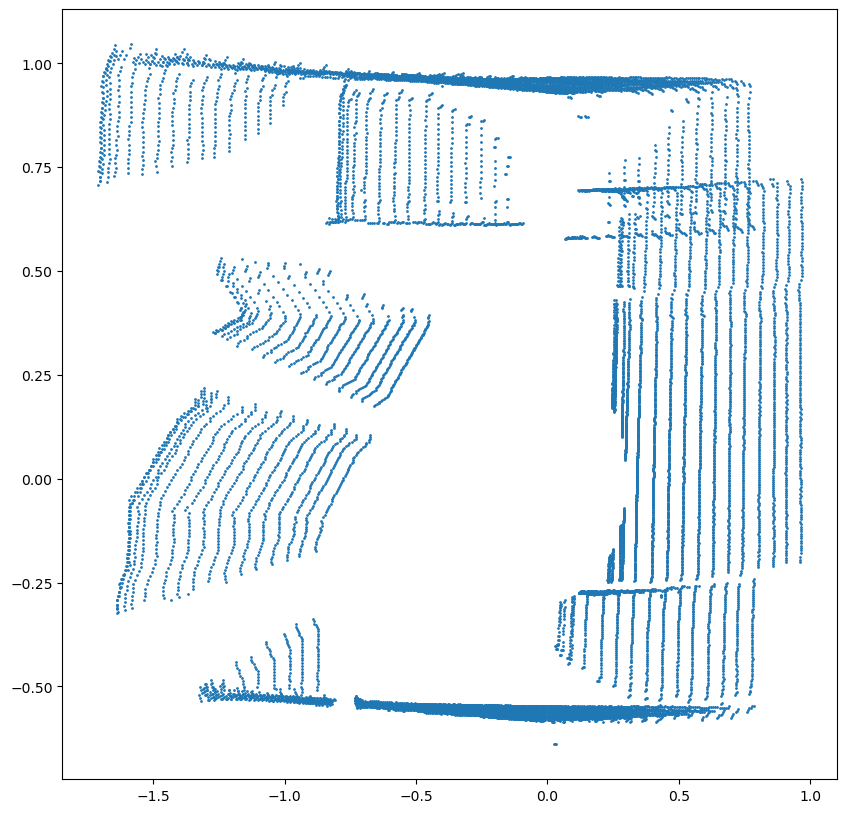

In [67]:
plt.figure(figsize=(10, 10))
plt.scatter(all_data_df.loc['X'], all_data_df.loc['Y'], s=1)
plt.show()


In [68]:
# write to csv
addition = '_GT'
with open(file_path + file_name + addition + '.csv', 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(all_data_df.loc['Rho'])
  writer.writerow(all_data_df.loc['Alpha'])
  writer.writerow(all_data_df.loc['X'])
  writer.writerow(all_data_df.loc['Y'])